In [510]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from SyntheticControlMethods import Synth
from SyntheticControlMethods import DiffSynth
from PIL import Image

Image.MAX_IMAGE_PIXELS = None

In [511]:
main = pd.read_csv('../data/main_cover.csv')

/var/folders/ln/dzrdlwzd6qddcly0z2x_rgm80000gn/T/ipykernel_83677/3939873324.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in main.groupby(['Country']):


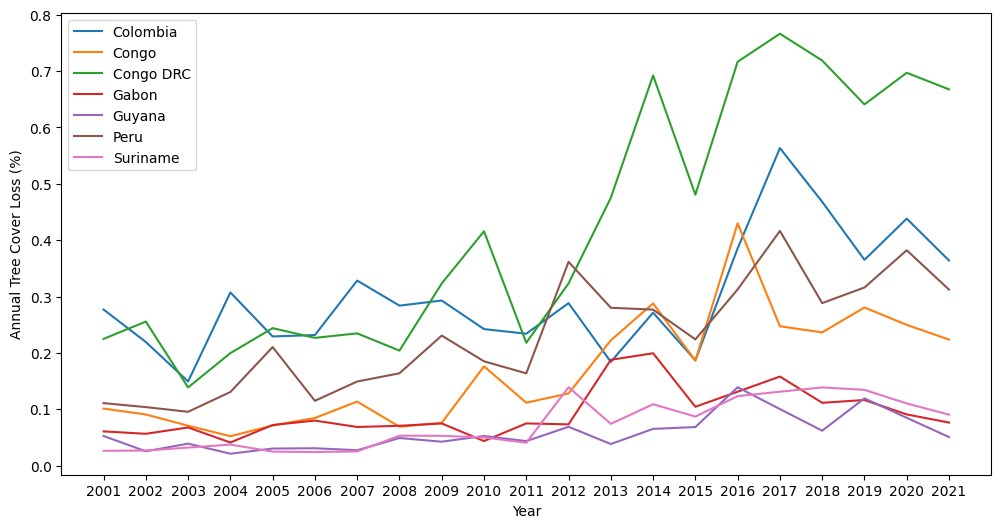

In [146]:
fig, ax = plt.subplots()
ax.set_ylabel('Annual Tree Cover Loss (%)')
for key, grp in main.groupby(['Country']):
    ax = grp.plot(ax=ax, kind='line', x='Year', y='Annual Tree Cover Loss', label=key, figsize=(12,6), xticks = [2000 + x for x in range(1,22)])

In [99]:
def match_covariate(row, cov_df):
    country = row['Country']
    year = row['Year']

    if country == 'Congo':
        country = 'Congo, Rep.'

    elif country == 'Congo DRC':
        country = 'Congo, Dem. Rep.'

    if str(year) in cov_df:
        if (cov_df[cov_df['Country Name'] == country][str(year)] != '..').iloc(0)[0]:
            return float(cov_df[cov_df['Country Name'] == country][str(year)])

def import_covariates(df, cov_dfs, cov_names):
    
    for i, cov_df in enumerate(cov_dfs):
        df[cov_names[i]] = df.apply(
            match_covariate, axis=1, args=(cov_df,))
    
    return df

In [512]:
pop_growth = pd.read_csv('../data/covariates/population_growth_annual.csv')
ag_land = pd.read_csv('../data/covariates/agricultural_land.csv')
gdp_growth = pd.read_csv('../data/covariates/gdp_growth.csv')
for_rents = pd.read_csv('../data/covariates/forest_rents.csv')
min_rents = pd.read_csv('../data/covariates/mineral_rents.csv')
gov_eff = pd.read_csv('../data/covariates/gov_eff.csv')
pro_areas = pd.read_csv('../data/covariates/protected_areas.csv')
liv_index = pd.read_csv('../data/covariates/livestock_index.csv')
el_acc = pd.read_csv('../data/covariates/electricity_access.csv')

In [513]:
main = main.drop(columns=['Unnamed: 0', 'Forest Cover'])

In [501]:
main = import_covariates(main, [pop_growth, ag_land, gdp_growth, for_rents, min_rents, gov_eff, pro_areas, liv_index, el_acc],
                  ['Population Growth', 'Agricultural Land', 'GDP Growth', 'Forest Rents', 'Mineral Rents', 'Government Effectiveness', 'Protected Area', 'Livestock Index', 'Electricity Access'])

In [514]:
main = import_covariates(main, [pop_growth, ag_land, gdp_growth, for_rents, min_rents, gov_eff, pro_areas],
                  ['Population Growth', 'Agricultural Land', 'GDP Growth', 'Forest Rents', 'Mineral Rents', 'Government Effectiveness', 'Protected Area'])

In [515]:
roopsind_countries = ['Peru', 'Colombia', 'Suriname', 'Congo', 'Congo DRC', 'Guyana']

In [516]:
main = main[main['Country'].isin(roopsind_countries)]

In [517]:
main

,Country,Year,Annual Tree Cover Loss,Population Growth,Agricultural Land,GDP Growth,Forest Rents,Mineral Rents,Government Effectiveness,Protected Area
0,Guyana,2001,0.052502,0.099812,5.716134,2.279522,8.490615,4.422916,NaN,4.987003
1,Guyana,2002,0.025239,0.067626,5.738694,1.132627,8.273747,4.511380,-0.179418,4.987003
2,Guyana,2003,0.038911,0.031429,5.761255,-0.632225,9.506019,7.442208,-0.022859,4.987003
3,Guyana,2004,0.020974,-0.018146,5.783815,1.563352,10.215034,10.984247,-0.040766,4.995118
4,Guyana,2005,0.030157,-0.094071,5.806375,-1.950958,10.624378,10.201725,-0.500309,5.004679
...,...,...,...,...,...,...,...,...,...,...
142,Congo DRC,2017,0.766448,3.442767,14.678106,3.726948,17.103966,7.001726,-1.634874,NaN
143,Congo DRC,2018,0.718888,3.272827,14.796321,5.821121,8.990381,8.011428,-1.539629,NaN
144,Congo DRC,2019,0.640969,3.186288,14.878366,4.384529,8.702887,4.321935,-1.618209,NaN
145,Congo DRC,2020,0.697155,3.224478,14.808672,1.735423,9.390393,4.993564,-1.714081,NaN


In [ ]:
sc = Synth(main, 'Annual Tree Cover Loss', 'Country', 'Year', 2011, 'Guyana')

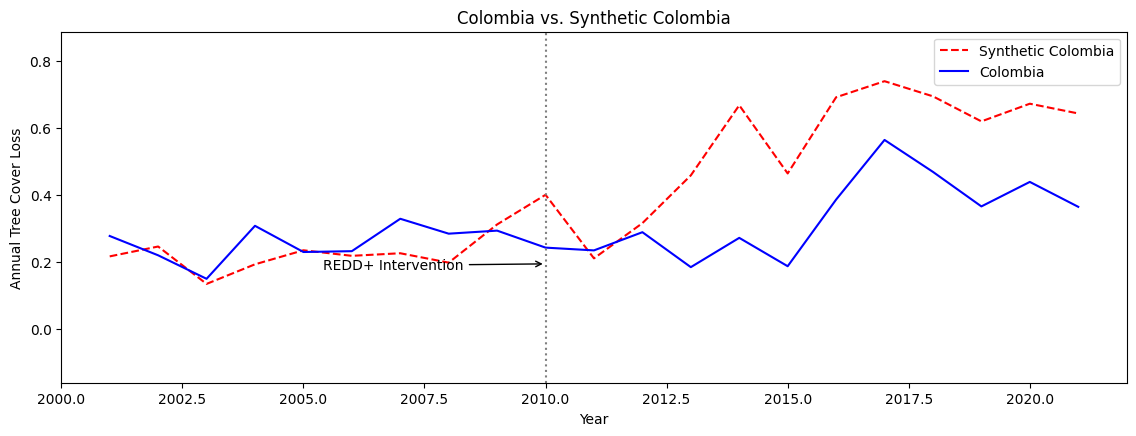

In [238]:
sc.plot(["original"], treated_label="Colombia", 
            synth_label="Synthetic Colombia", treatment_label="REDD+ Intervention", figsize = (12,5))

In [227]:
#New 9 covariates for Colombia treatment
sc.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Colombia,0.076112,0.214717,2.821073


In [239]:
#Original 7 covariates for Colombia treatment
sc.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Colombia,0.078257,0.248666,3.177554


In [195]:
#Original 7 covariates for Guyana treatment
sc.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Guyana,0.010163,0.041298,4.063425


In [200]:
#New 9 covariates for Guyana treatment
sc.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Guyana,0.01105,0.040503,3.665407


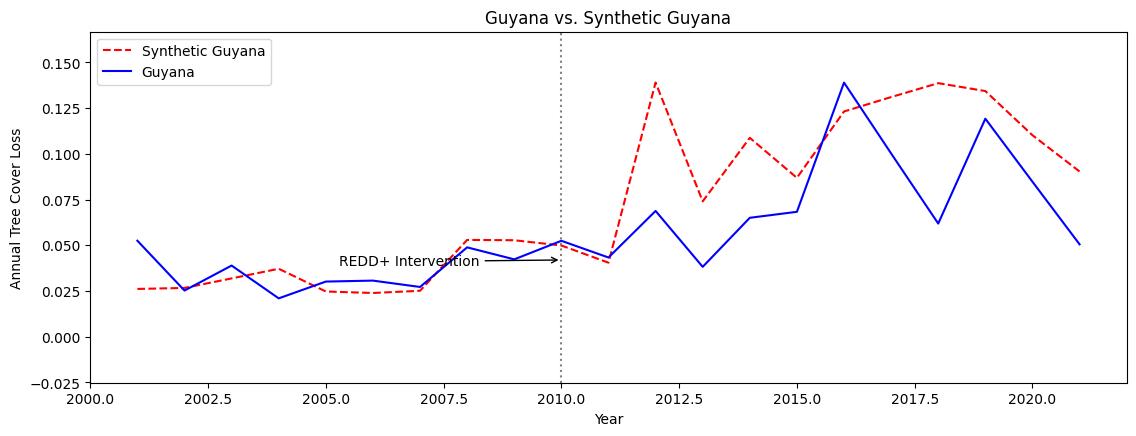

In [199]:
sc.plot(["original"], treated_label="Guyana", 
            synth_label="Synthetic Guyana", treatment_label="REDD+ Intervention", figsize = (12,5))

In [190]:
sc.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Guyana,0.010163,0.041298,4.063425


In [ ]:
sc.in_space_placebo()

In [19]:
sc.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Guyana,0.010163,0.041298,4.063425


In [94]:
sc.original_data.weight_df

,Weight
Congo,0.976073
Zambia,0.023927


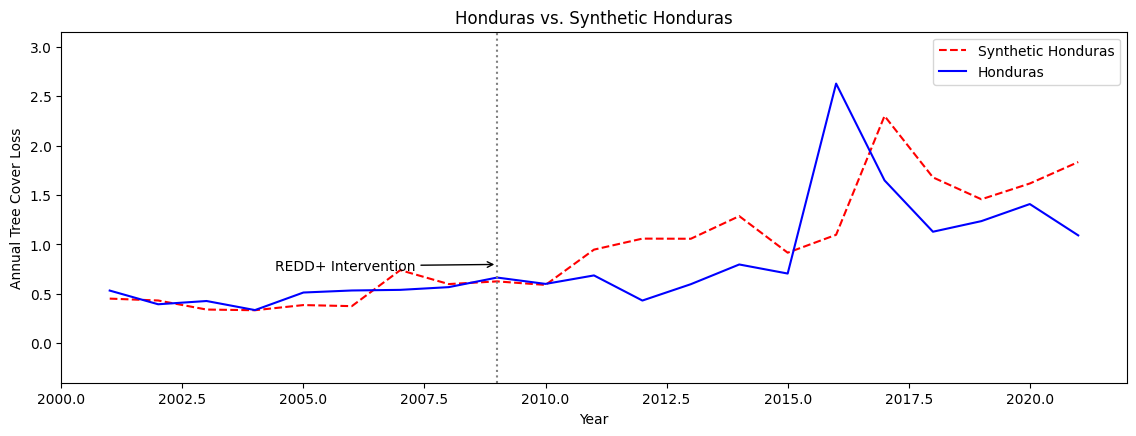

In [109]:
sc.plot(["original"], treated_label="Honduras", 
            synth_label="Synthetic Honduras", treatment_label="REDD+ Intervention", figsize=(12, 5))

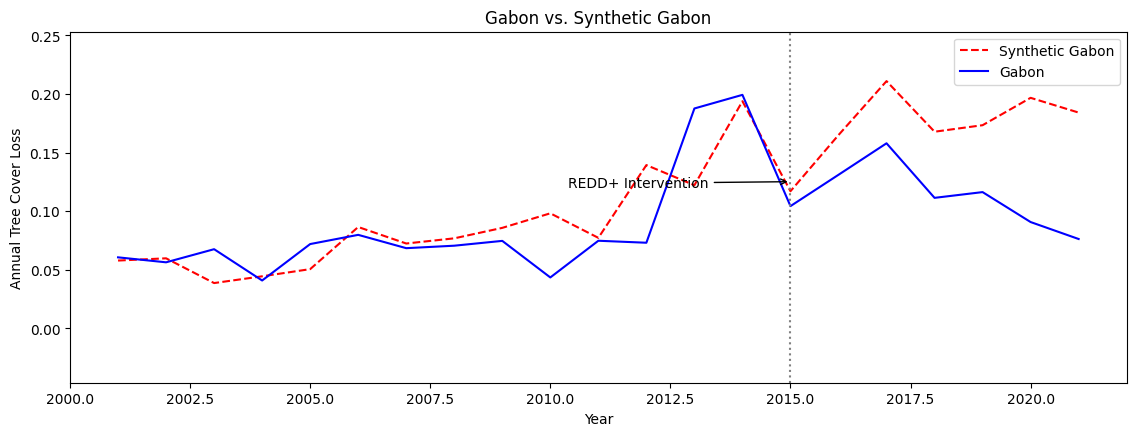

In [111]:
#Using full donor set and only livestock as extra covariate
sc.plot(["original"], treated_label="Gabon", 
            synth_label="Synthetic Gabon", treatment_label="REDD+ Intervention", figsize=(12, 5))

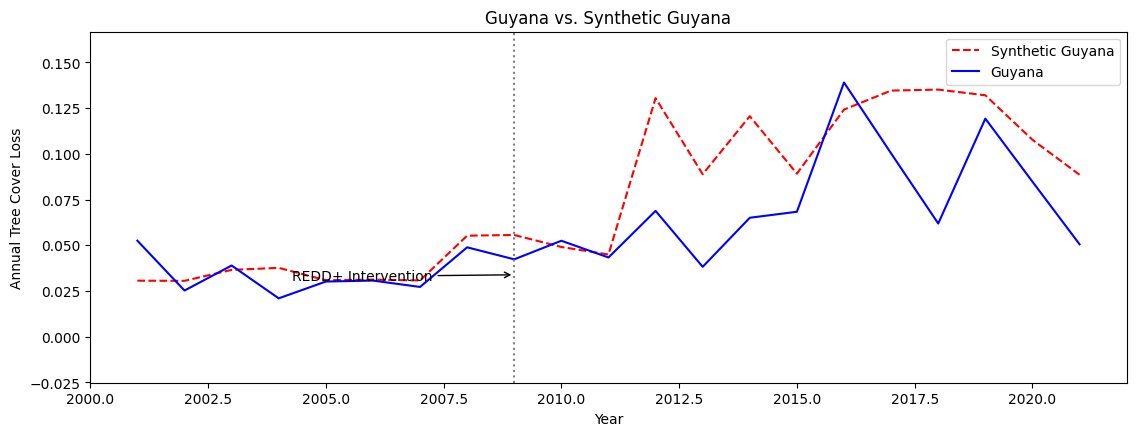

In [151]:
sc.plot(["original"], treated_label="Guyana", 
            synth_label="Synthetic Guyana", treatment_label="REDD+ Intervention", figsize=(12, 5))

In [132]:
sc.original_data.weight_df

,Weight
Suriname,0.992778


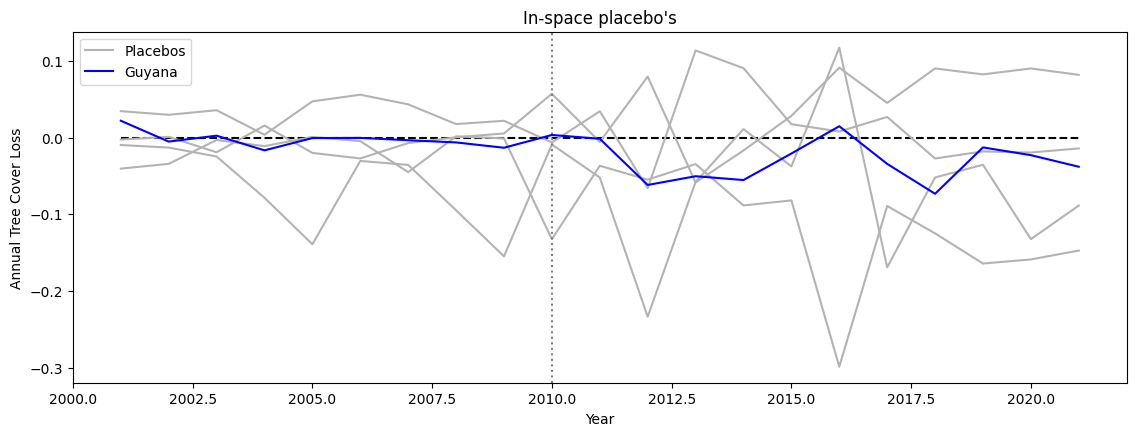

In [24]:
sc.plot(["in-space placebo"], treated_label="Guyana", 
            synth_label="Synthetic Guyana", treatment_label="REDD+ Intervention", figsize=(12, 5))

In [ ]:
sc.in_space_placebo(15)

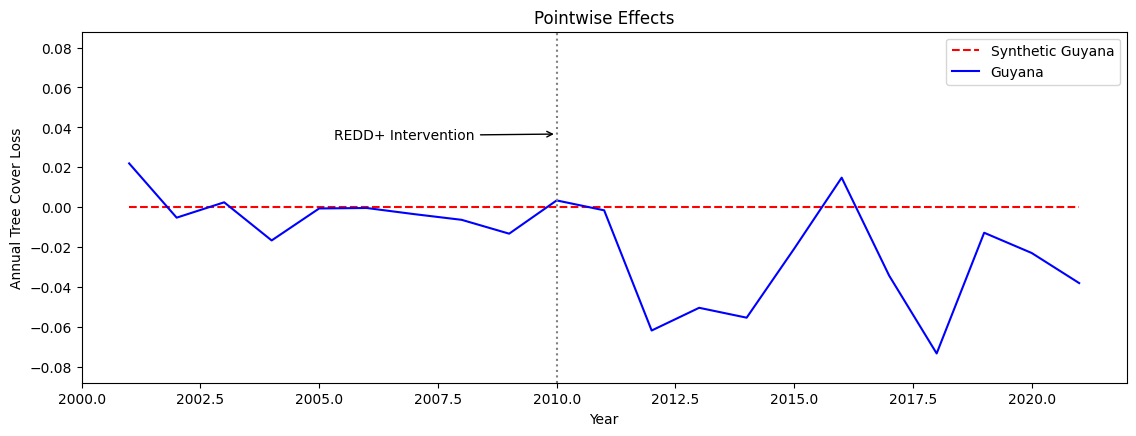

In [182]:
sc.plot(["pointwise"], treated_label="Guyana", 
            synth_label="Synthetic Guyana", treatment_label="REDD+ Intervention", figsize=(12, 5))

In [112]:
s_gabon = sc.original_data.synth_outcome

In [113]:
gabon = np.array(main[main['Country'] == 'Gabon']['Annual Tree Cover Loss'])

In [115]:
avoided

array([[ -4.72855148,   5.70510753, -74.75248637,   8.06025323,
        -42.32461449,   7.74320196,   5.49234081,   8.18112229,
         12.95314254,  55.75111482,   3.19668928,  47.56048338,
        -53.60092112,  -2.80344287,  10.86270901,  20.55032155,
         25.14821894,  33.63041606,  32.92975189,  53.88248563,
         58.59243174]])

In [114]:
avoided = ((s_gabon - gabon)/s_gabon*100)
avoided[0][-5:].mean()

40.836660848843664

In [120]:
sc.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Honduras,0.097631,0.575268,5.892294


In [ ]:
sc.plot(["original", "in-space placebo"], treated_label="Guyana", 
            synth_label="Synthetic Guyana", treatment_label="REDD+ Intervention")

In [32]:
sc.original_data.weight_df

,Weight
Suriname,0.869725
Gabon,0.130275


In [33]:
sc.original_data.comparison_df

,Guyana,Synthetic Guyana,WMAPE,Importance
Annual Tree Cover Loss,0.04,0.04,0.01,0.00
Population Growth,-0.11,1.54,1.65,0.55
Agricultural Land,5.81,1.48,4.93,0.03
GDP Growth,2.23,4.40,2.53,0.00
Forest Rents,7.68,0.78,6.90,0.00
Mineral Rents,6.35,3.33,3.01,0.00
Government Effectiveness,-0.18,-0.23,0.08,0.41


In [118]:
sc.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Gabon,0.029915,0.074490,2.490058
1,Guyana,0.053874,0.059517,1.104752
2,Suriname,0.073749,0.083697,1.134886
3,Congo,0.040266,0.080304,1.994324
4,Peru,0.072615,0.084447,1.162938
5,Colombia,0.108435,0.052841,0.487305
6,Congo DRC,0.061166,0.172991,2.828220
7,Nigeria,0.459899,2.152252,4.679839
8,Cameroon,0.065053,0.130012,1.998562
9,Central African Republic,0.078080,0.119765,1.533879


In [ ]:
sc.in_space_placebo()

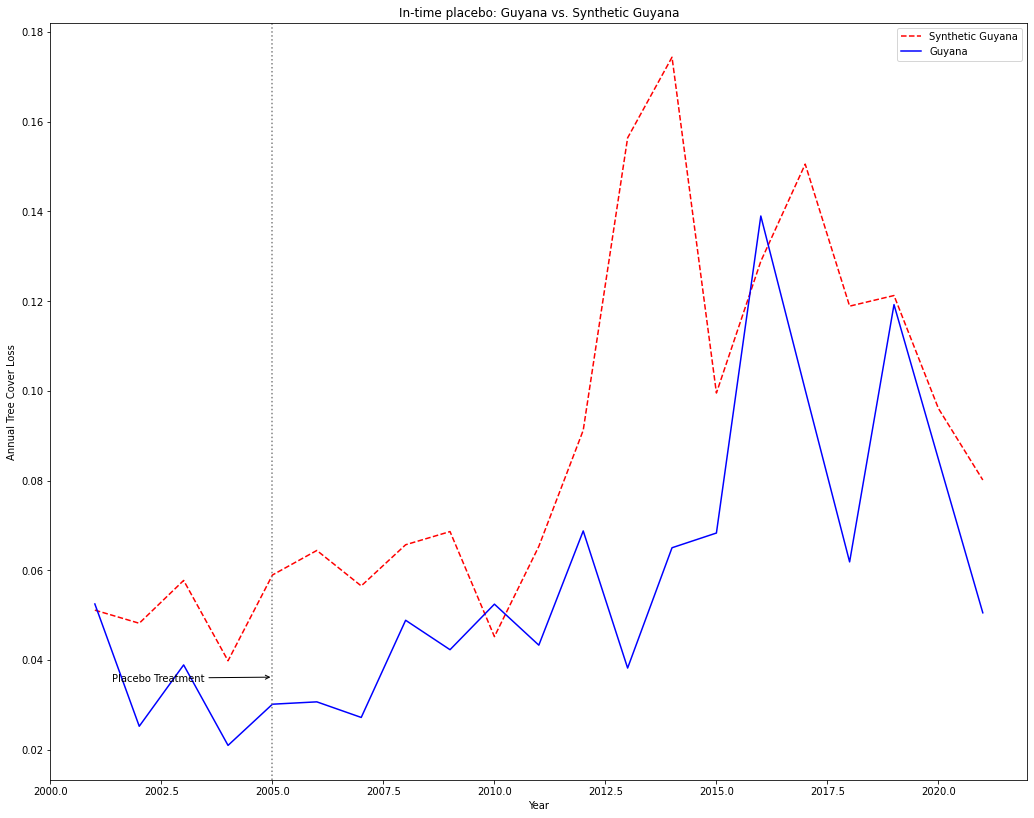

In [16]:
sc.plot(['in-time placebo'], 
            treated_label="Guyana",
            synth_label="Synthetic Guyana")

In [ ]:
sc.in_space_placebo()

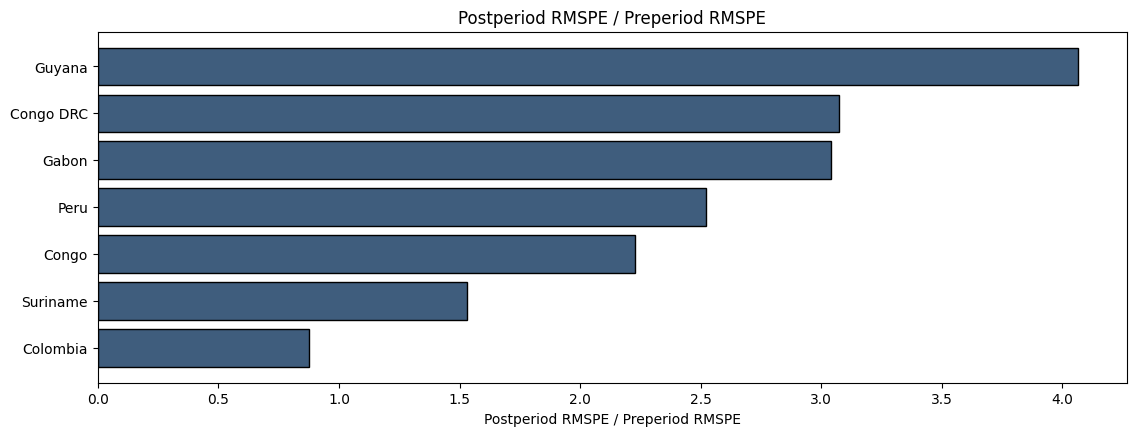

In [161]:
sc.plot(['rmspe ratio'], figsize = (12, 5))

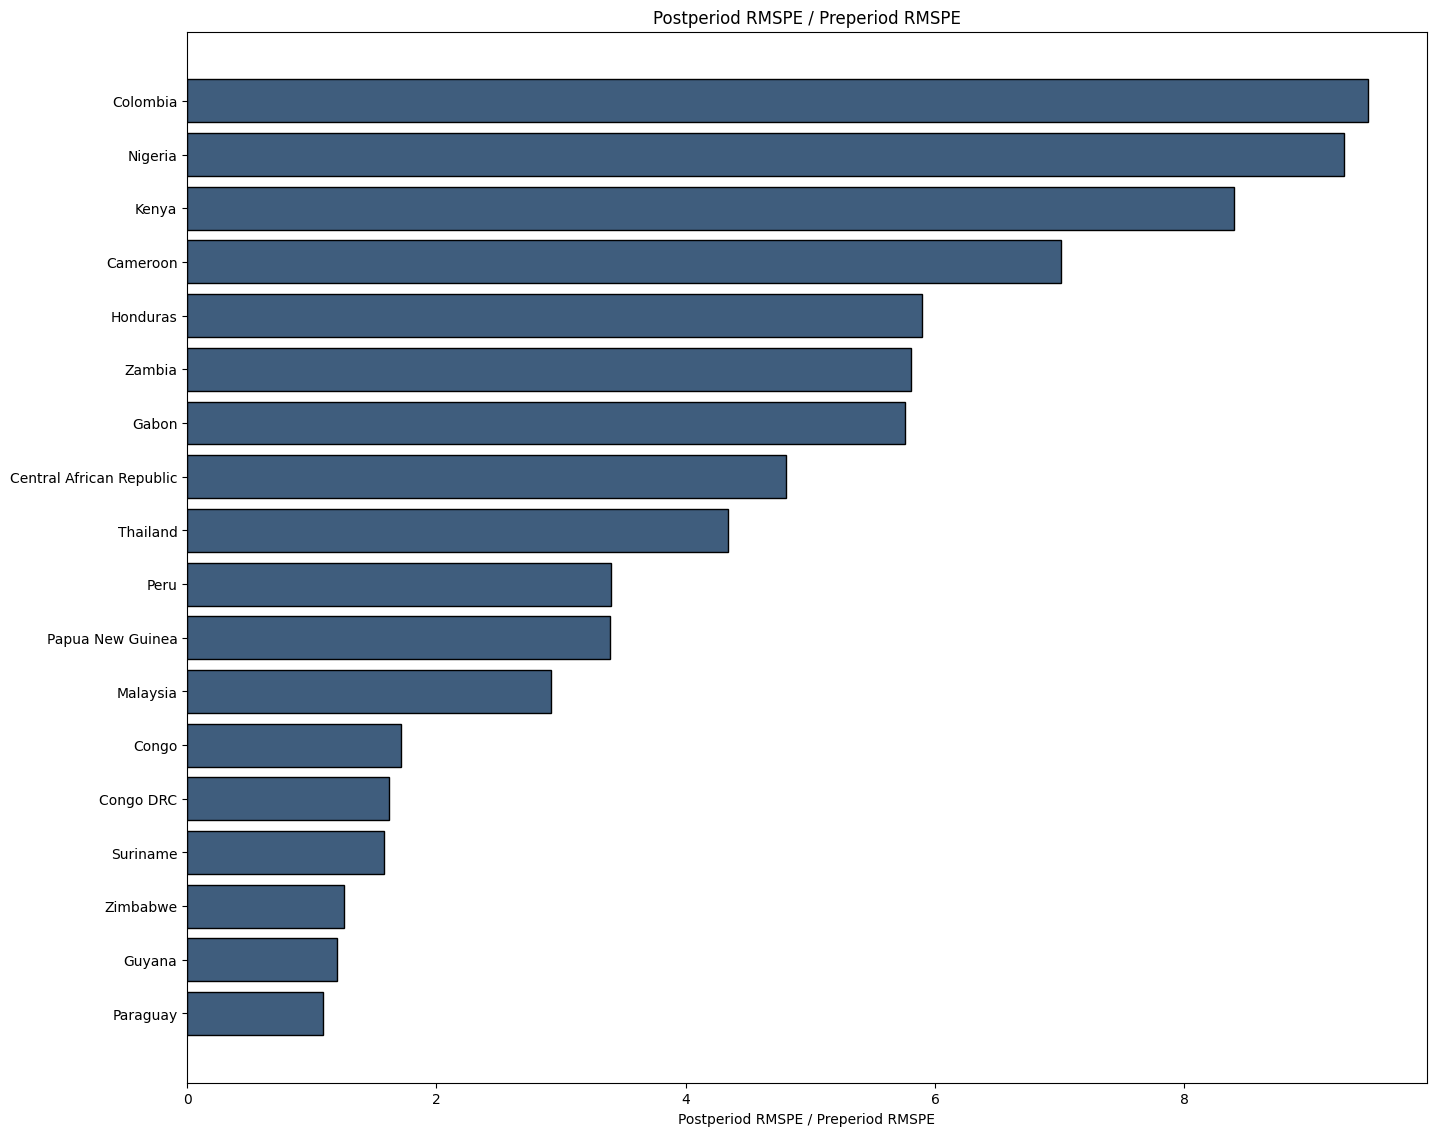

In [122]:
sc.plot(['rmspe ratio'])

In [ ]:
dsc = DiffSynth(main, 'Annual Tree Cover Loss',
           'Country', 'Year', 2010, 'Guyana')

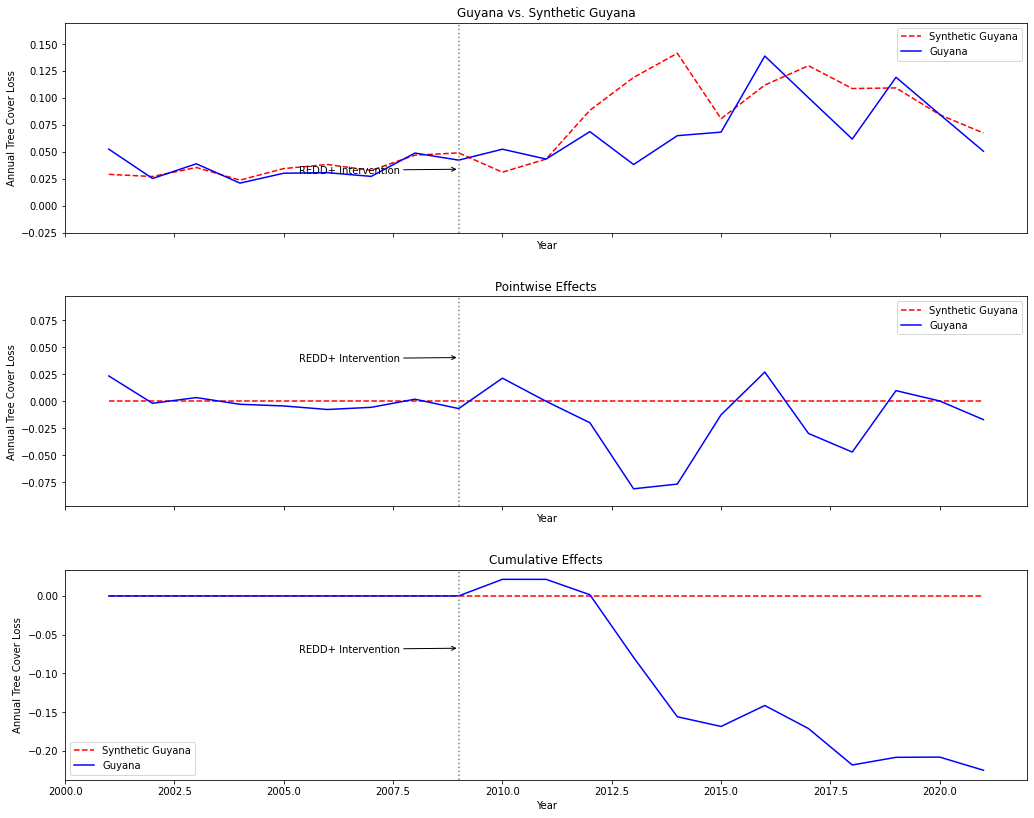

In [25]:
dsc.plot(["original", "pointwise", "cumulative"], treated_label="Guyana", 
            synth_label="Synthetic Guyana", treatment_label="REDD+ Intervention")

In [26]:
dsc.original_data.weight_df

,Weight
Suriname,0.468251
Gabon,0.531749


In [28]:
dsc.original_data.comparison_df

,Guyana,Synthetic Guyana,WMAPE,Importance
Annual Tree Cover Loss,-0.00,0.00,0.02,0.04
Population Growth,-0.14,2.17,2.28,0.60
Agricultural Land,5.82,4.55,3.72,0.13
GDP Growth,2.23,2.71,2.01,0.23
Forest Rents,7.58,2.02,5.63,0.00
Mineral Rents,6.59,1.87,4.55,0.00


In [ ]:
dsc.in_time_placebo(2005, n_optim = 20)

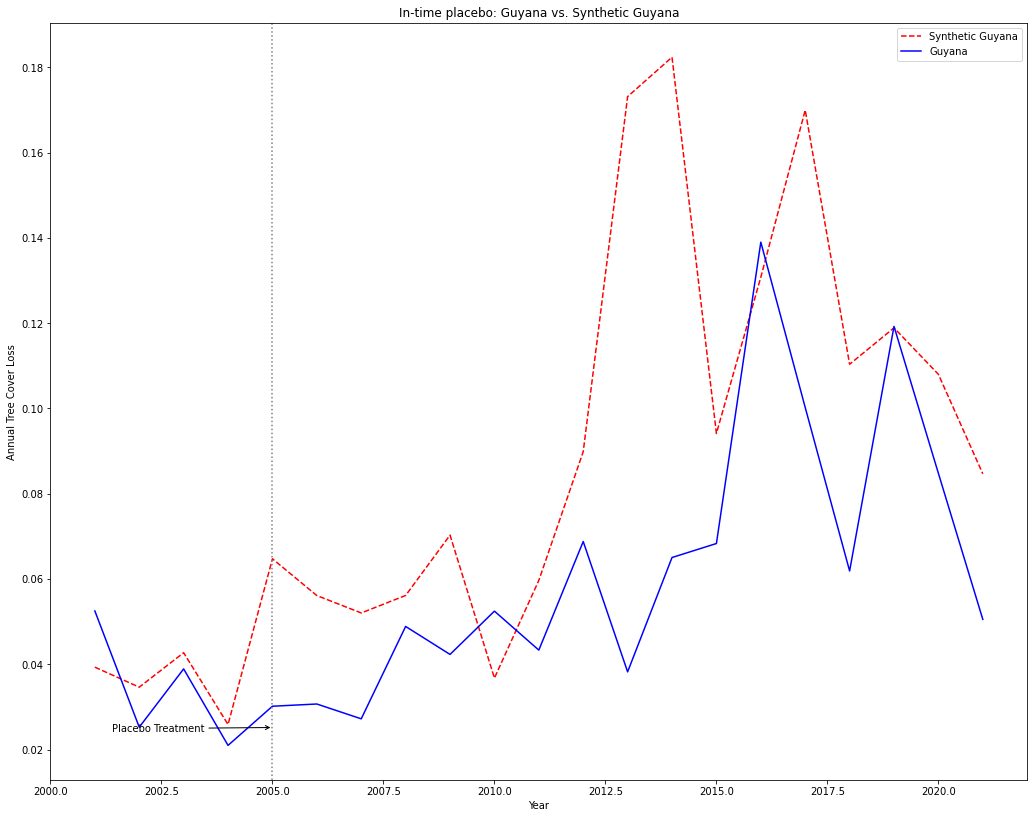

In [31]:
dsc.plot(['in-time placebo'], 
            treated_label="Guyana",
            synth_label="Synthetic Guyana")

In [ ]:
dsc.in_space_placebo(15)

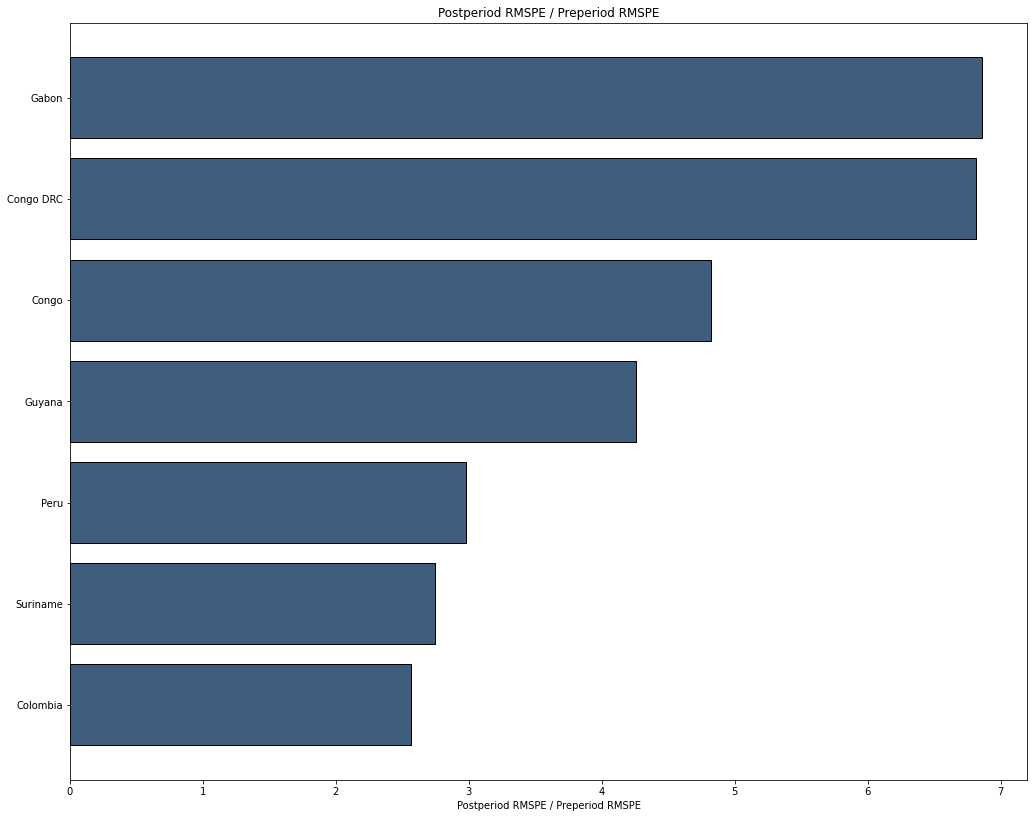

In [33]:
dsc.plot(['rmspe ratio'])

In [ ]:
sc = Synth(main[main['Country'] != 'Guyana'], 'Annual Tree Cover Loss',
           'Country', 'Year', 2015, 'Gabon')

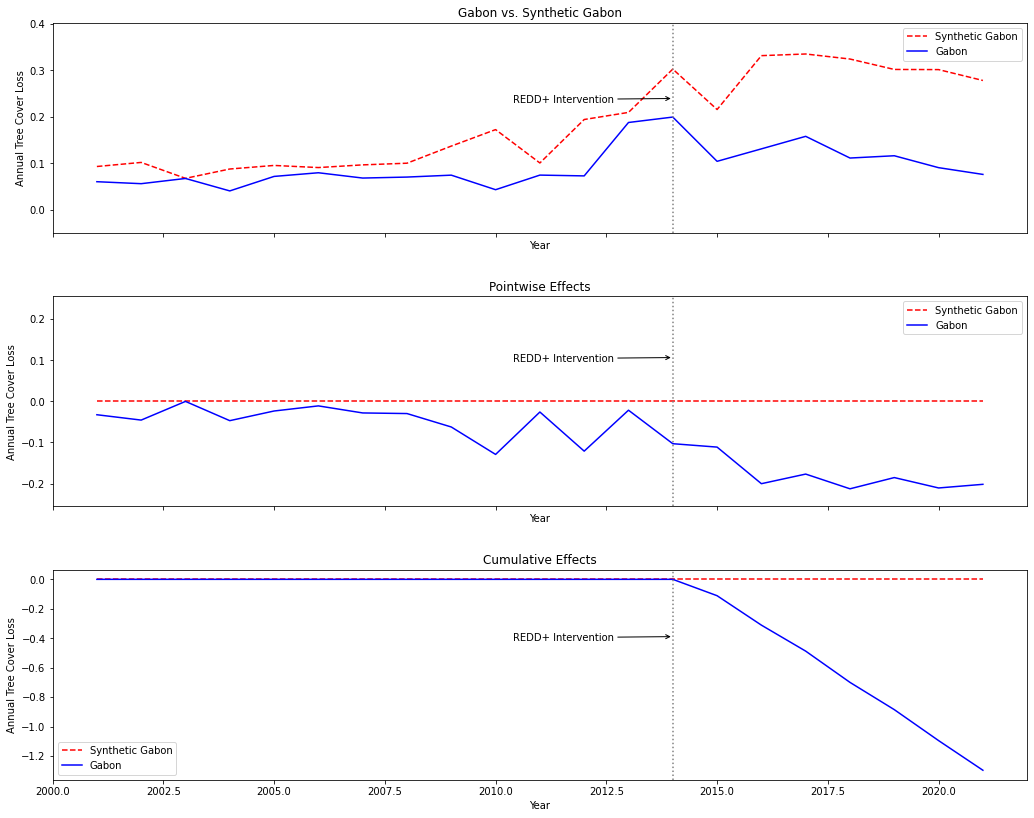

In [17]:
sc.plot(["original", "pointwise", "cumulative"], treated_label="Gabon", 
            synth_label="Synthetic Gabon", treatment_label="REDD+ Intervention")

In [ ]:
sc_drc = Synth(main[main['Country'] != 'Guyana'], 'Annual Tree Cover Loss',
           'Country', 'Year', 2009, 'Congo DRC')

array([[0.0305564 , 0.0304819 , 0.03646192, 0.03763349, 0.0307901 ,
        0.03108313, 0.03067831, 0.05519627, 0.05557397, 0.04906244,
        0.04488499, 0.1305648 , 0.08862224, 0.12039208, 0.08912192,
        0.12418898, 0.13451438, 0.13516747, 0.13203713, 0.10770889,
        0.08855851]])

In [ ]:
sc.plot(["original", "pointwise", "cumulative"], treated_label="Guyana", 
            synth_label="Synthetic Guyana", treatment_label="REDD+ Intervention")

In [8]:
from tbscm.utils import data
from tbscm.synthetic_controls import SyntheticControl as SC
from tbscm.synthetic_controls import TreeBasedSyntheticControl as TBSC
from tbscm.synthetic_controls import ElasticNetSyntheticControl as ENSC

ModuleNotFoundError: No module named 'sklearnex'

In [7]:
pip install sklearnex

ERROR: Could not find a version that satisfies the requirement sklearnex (from versions: none)
ERROR: No matching distribution found for sklearnex
Note: you may need to restart the kernel to use updated packages.


In [381]:
main

,Country,Year,Annual Tree Cover Loss,Population Growth,Agricultural Land,GDP Growth,Forest Rents,Mineral Rents,Government Effectiveness,Protected Area
0,Guyana,2001,0.052502,0.099812,5.716134,2.279522,8.490615,4.422916,NaN,4.987003
1,Guyana,2002,0.025239,0.067626,5.738694,1.132627,8.273747,4.511380,-0.179418,4.987003
2,Guyana,2003,0.038911,0.031429,5.761255,-0.632225,9.506019,7.442208,-0.022859,4.987003
3,Guyana,2004,0.020974,-0.018146,5.783815,1.563352,10.215034,10.984247,-0.040766,4.995118
4,Guyana,2005,0.030157,-0.094071,5.806375,-1.950958,10.624378,10.201725,-0.500309,5.004679
...,...,...,...,...,...,...,...,...,...,...
142,Congo DRC,2017,0.766448,3.442767,14.678106,3.726948,17.103966,7.001726,-1.634874,NaN
143,Congo DRC,2018,0.718888,3.272827,14.796321,5.821121,8.990381,8.011428,-1.539629,NaN
144,Congo DRC,2019,0.640969,3.186288,14.878366,4.384529,8.702887,4.321935,-1.618209,NaN
145,Congo DRC,2020,0.697155,3.224478,14.808672,1.735423,9.390393,4.993564,-1.714081,NaN


In [261]:
mds_test = main.set_index('Country').groupby('Country').mean().drop(columns='Year')

In [265]:
mds_test = mds_test.drop(columns='Energy Use')

In [266]:
mds = MDS(random_state=0)
scaled_df = mds.fit_transform(mds_test)

/Users/onkar/Documents/AI4ER/MRes Project/.venv/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [291]:
import seaborn as sns

In [324]:
mds_test

,Annual Tree Cover Loss,Population Growth,Agricultural Land,GDP Growth,Forest Rents,Mineral Rents,Government Effectiveness,Protected Area,Livestock Index
Country,,,,,,,,,
Cameroon,0.273747,2.804898,20.107994,3.990457,2.772060,0.038927,-0.862211,9.487984,95.037619
Central African Republic,0.101691,1.774901,8.233089,1.403779,10.479933,0.030089,-1.556823,17.785490,90.763810
Colombia,0.300429,1.299241,39.787139,3.662428,0.133492,0.515699,-0.106718,20.504865,91.600000
Congo,0.167009,2.960441,30.998389,1.704129,3.599621,0.007352,-1.234788,13.252015,84.816667
Congo DRC,0.422091,3.234693,12.867978,5.245995,17.371892,4.315208,-1.629719,10.360692,97.474286
Gabon,0.093192,2.901569,8.293939,2.273111,2.874357,0.027589,-0.789895,15.126299,94.161429
Guyana,0.057551,0.277311,6.010159,5.790165,6.521300,6.210244,-0.209380,5.036705,89.868095
Honduras,0.831740,2.068627,29.327464,3.716740,1.341391,0.191591,-0.670770,18.703597,95.442857
Kenya,0.858429,2.577186,48.032031,4.416542,2.906667,0.026011,-0.530238,11.727693,93.380952


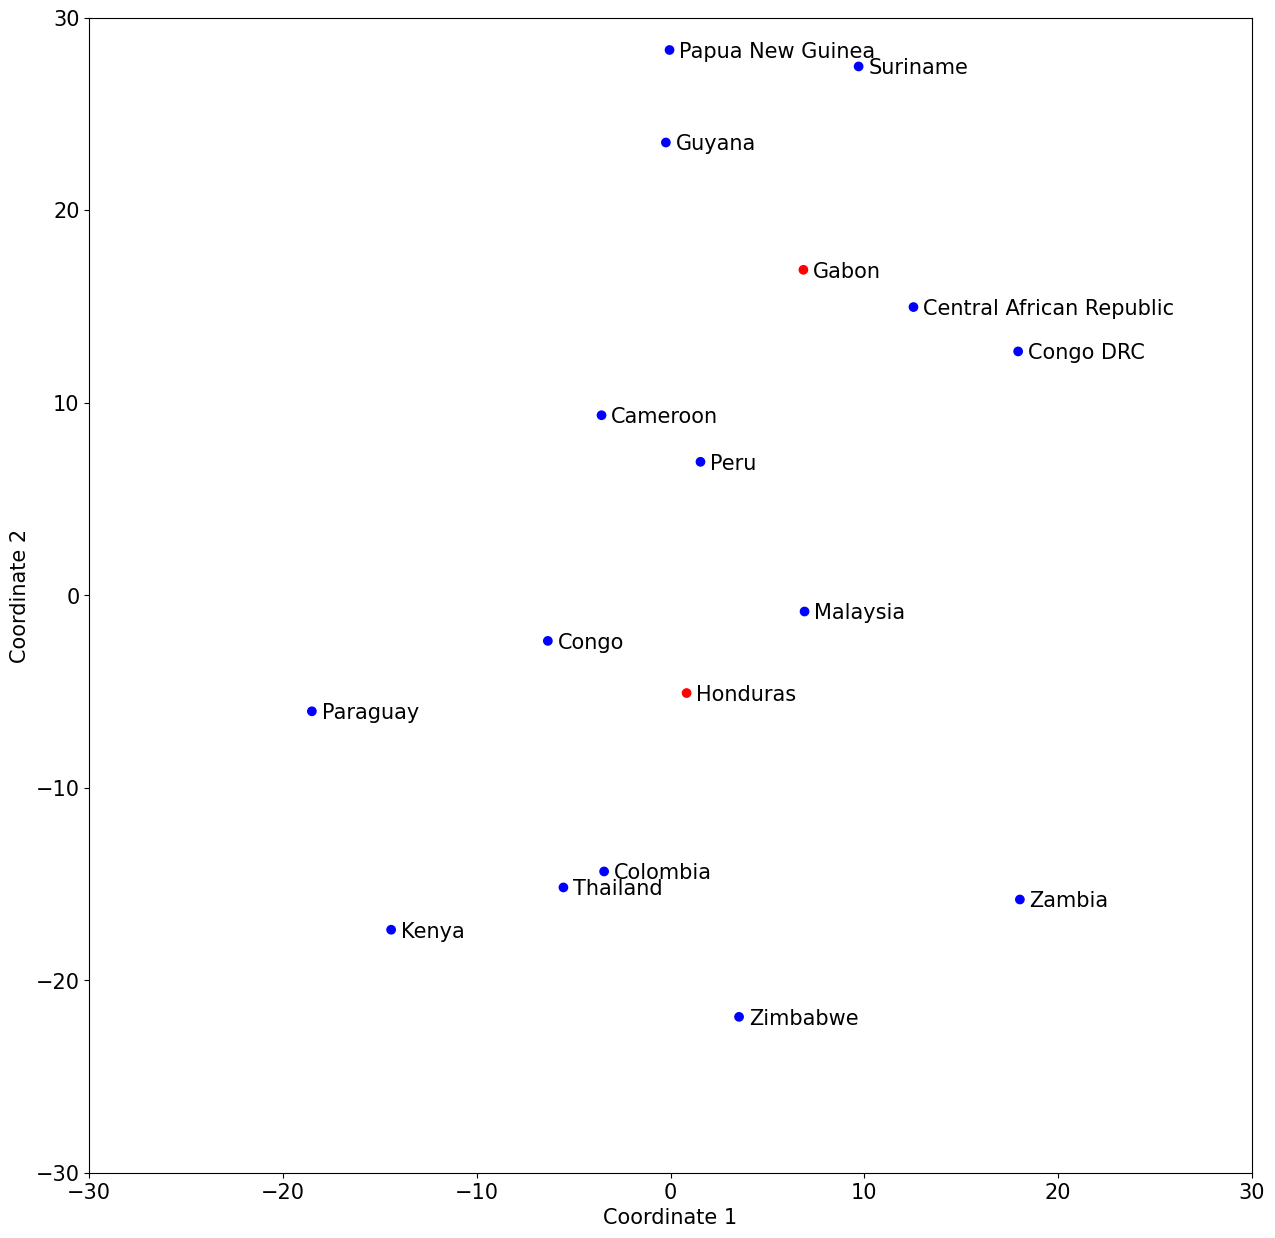

In [496]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize = (15,15))
colors = ['b'] * 18
colors[7], colors[5] = 'r', 'r'
plt.scatter(scaled_df[:,0], scaled_df[:,1], c = colors)

#add axis labels
plt.xlabel('Coordinate 1')
plt.ylabel('Coordinate 2')
plt.xlim((-30, 30))
plt.ylim((-30,30))

#add lables to each point
for i, txt in enumerate(mds_test.index):
    plt.annotate(txt, (scaled_df[:,0][i]+0.5, scaled_df[:,1][i]-0.4))

#display scatterplot
plt.show()

In [497]:
scaled_df

array([[ -3.56062508,   9.34996357],
       [ 12.53902711,  14.96942729],
       [ -3.42818454, -14.3497326 ],
       [ -6.33193689,  -2.37247138],
       [ 17.94179929,  12.66497877],
       [  6.85860104,  16.90478891],
       [ -0.23975054,  23.51772955],
       [  0.8300394 ,  -5.08152915],
       [-14.42098639, -17.37698821],
       [  6.91804251,  -0.84575387],
       [-25.83828464, -41.1847238 ],
       [ -0.05069216,  28.32400143],
       [-18.51155951,  -6.02877425],
       [  1.54601677,   6.92990173],
       [  9.70804701,  27.46874151],
       [ -5.52778342, -15.17978818],
       [ 18.03160626, -15.80653684],
       [  3.5366238 , -21.90323447]])

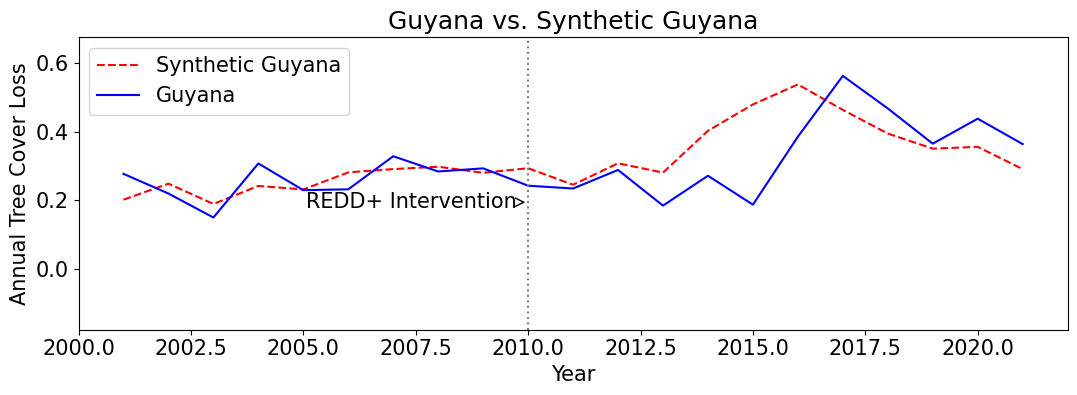

In [365]:
sc.plot(["original"], treated_label="Colombia", 
            synth_label="Synthetic Colombia", treatment_label="REDD+ Intervention", figsize=(12, 5))

In [366]:
sc.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Colombia,0.043913,0.122089,2.780251


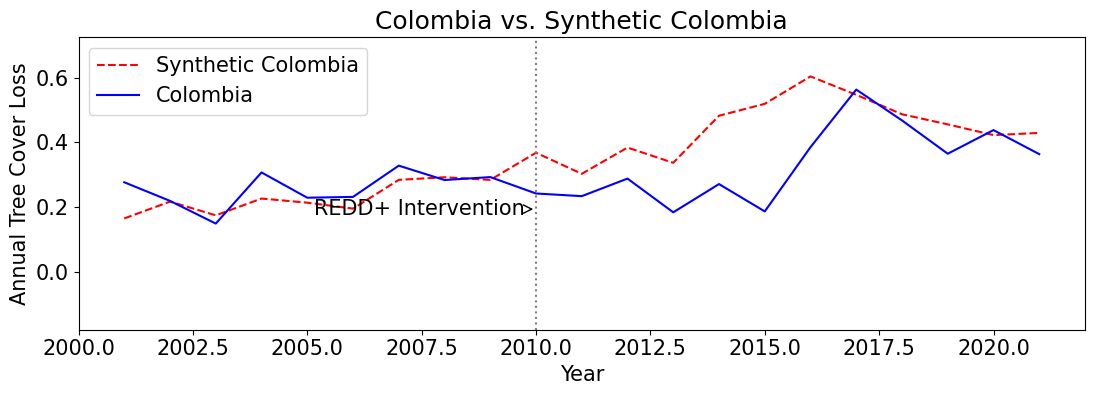

In [374]:
sc.plot(["original"], treated_label="Colombia", 
            synth_label="Synthetic Colombia", treatment_label="REDD+ Intervention", figsize=(12, 5))

In [375]:
sc.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Colombia,0.062589,0.151929,2.427404


In [377]:
sc.original_data.weight_df

,Weight
Congo DRC,0.262708
Papua New Guinea,0.658980
Paraguay,0.078312


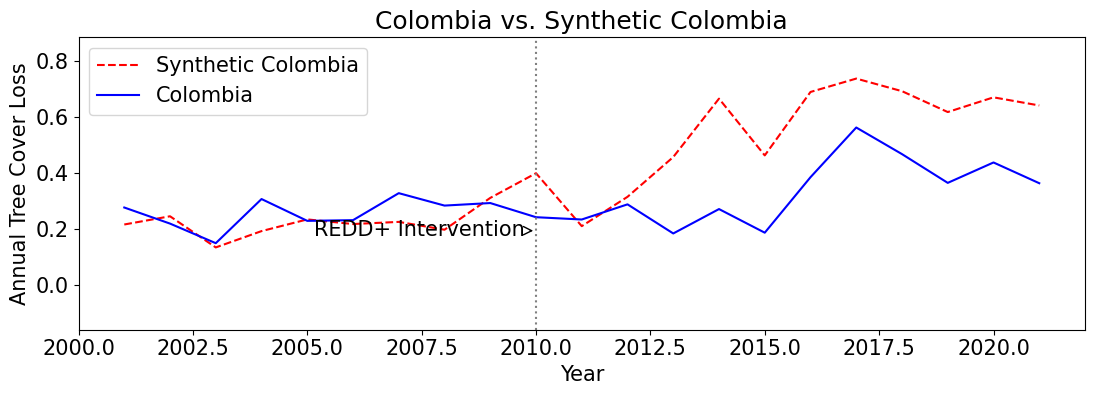

In [379]:
sc.plot(["original"], treated_label="Colombia", 
            synth_label="Synthetic Colombia", treatment_label="REDD+ Intervention", figsize=(12, 5))

In [380]:
sc.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Colombia,0.078257,0.248666,3.177554


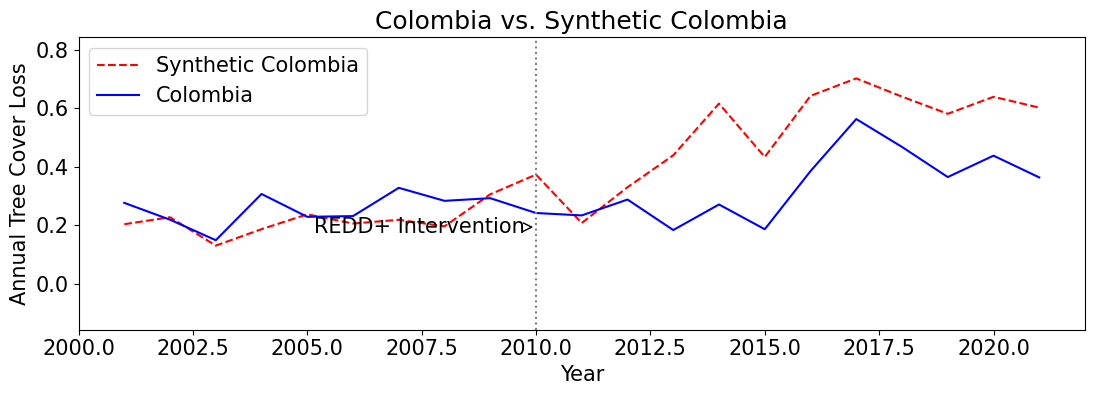

In [393]:
sc.plot(["original"], treated_label="Colombia", 
            synth_label="Synthetic Colombia", treatment_label="REDD+ Intervention", figsize=(12, 5))

In [394]:
sc.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Colombia,0.076112,0.214716,2.821073


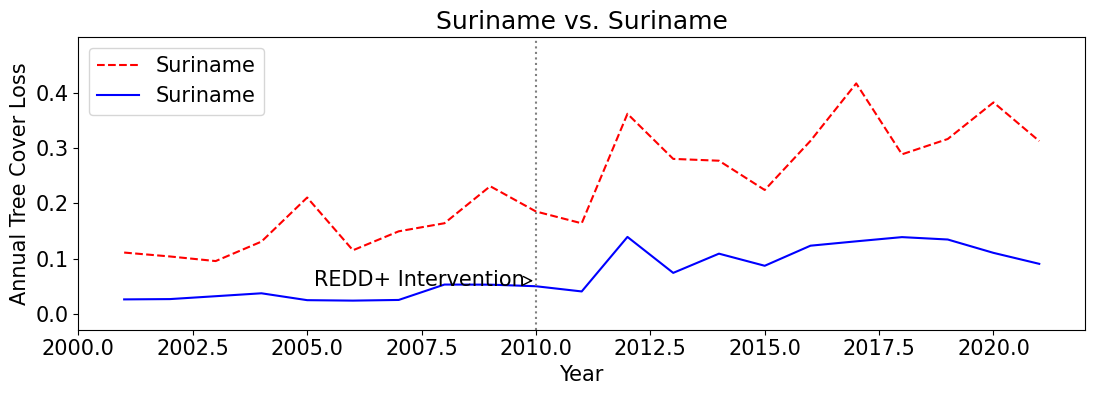

In [418]:
#All covariates, Suriname with roopsind countries

sc.plot(["original"], treated_label="Suriname", 
            synth_label="Suriname", treatment_label="REDD+ Intervention", figsize=(12, 5))

In [417]:
sc.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Suriname,0.120869,0.20226,1.673373


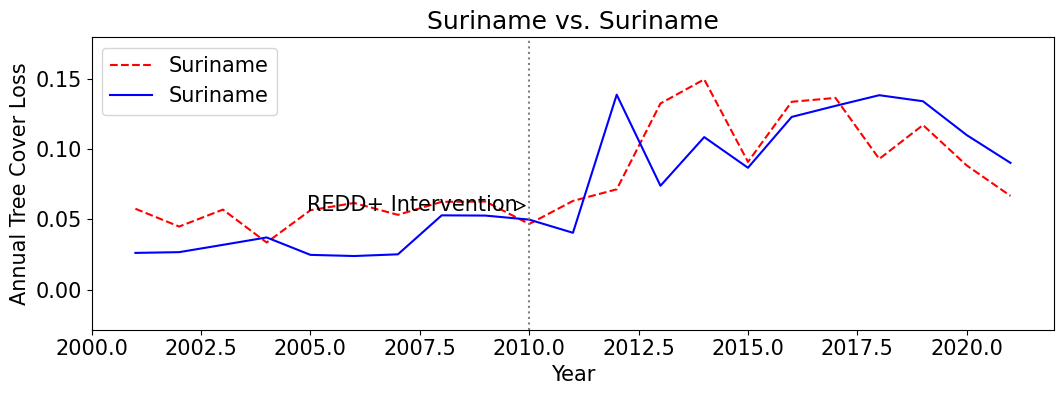

In [406]:
sc.plot(["original"], treated_label="Suriname", 
            synth_label="Suriname", treatment_label="REDD+ Intervention", figsize=(12, 5))

In [407]:
sc.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Suriname,0.023275,0.035383,1.52021


In [ ]:
sc = Synth(main, 'Annual Tree Cover Loss', 'Country', 'Year', 2011, 'Malaysia', n_optim=20)

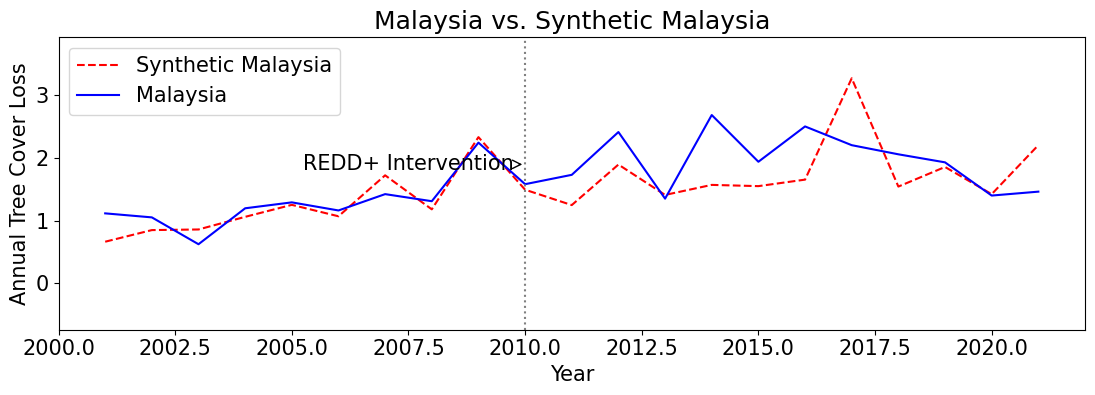

In [494]:
sc.plot(["original"], treated_label="Malaysia", 
            synth_label="Synthetic Malaysia", treatment_label="REDD+ Intervention", figsize=(12, 5))

In [495]:
sc.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Malaysia,0.213153,0.646599,3.033504


In [466]:
sc.original_data.weight_df

,Weight
Suriname,0.298218
Gabon,0.478111
Congo DRC,0.100844
Papua New Guinea,0.122827


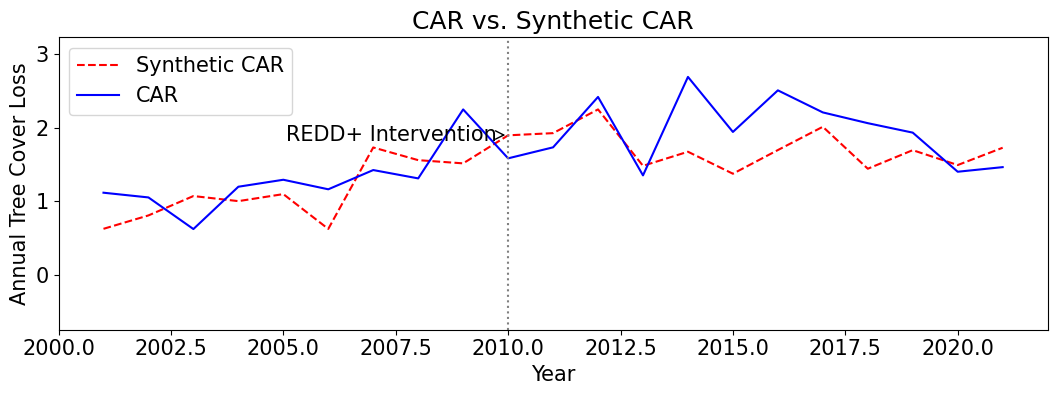

In [481]:
sc.plot(["original"], treated_label="CAR", 
            synth_label="Synthetic CAR", treatment_label="REDD+ Intervention", figsize=(12, 5))

In [482]:
sc.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Malaysia,0.406976,0.490736,1.205811


In [483]:
sc.original_data.weight_df

,Weight
Paraguay,0.881647
Zambia,0.118353


In [492]:
main

,Country,Year,Annual Tree Cover Loss,Population Growth,Agricultural Land,GDP Growth,Forest Rents,Mineral Rents,Government Effectiveness,Protected Area
0,Guyana,2001,0.052502,0.099812,5.716134,2.279522,8.490615,4.422916,NaN,4.987003
1,Guyana,2002,0.025239,0.067626,5.738694,1.132627,8.273747,4.511380,-0.179418,4.987003
2,Guyana,2003,0.038911,0.031429,5.761255,-0.632225,9.506019,7.442208,-0.022859,4.987003
3,Guyana,2004,0.020974,-0.018146,5.783815,1.563352,10.215034,10.984247,-0.040766,4.995118
4,Guyana,2005,0.030157,-0.094071,5.806375,-1.950958,10.624378,10.201725,-0.500309,5.004679
...,...,...,...,...,...,...,...,...,...,...
373,Zambia,2017,1.603289,3.113595,32.063923,3.504336,7.447209,5.687995,-0.671801,NaN
374,Zambia,2018,1.352421,3.061888,32.063923,4.034494,4.936720,6.453371,-0.624778,NaN
375,Zambia,2019,1.151418,3.007618,32.063923,1.441306,5.619481,5.805043,-0.717326,NaN
376,Zambia,2020,1.537859,2.933818,32.063923,-2.785055,7.607328,4.057635,-0.802456,NaN


In [508]:
sc = Synth(main, 'Annual Tree Cover Loss', 'Country', 'Year', 2010, 'Honduras', n_optim=20)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.44220D-01    |proj g|=  9.00000D-01

At iterate    3    f=  3.04706D-01    |proj g|=  1.26916D-01

At iterate    6    f=  1.20384D-01    |proj g|=  3.28463D-01

At iterate    9    f=  8.78110D-02    |proj g|=  5.07495D-02
  Positive dir derivative in projection 
  Using the backtracking step 
  ys=-3.723E-03  -gs= 4.703E-03 BFGS update SKIPPED

At iterate   12    f=  7.82070D-02    |proj g|=  6.70689D-02

At iterate   15    f=  6.96588D-02    |proj g|=  7.45195D-02

At iterate   18    f=  6.81829D-02    |proj g|=  3.19779D-03

At iterate   21    f=  6.80595D-02    |proj g|=  7.62776D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f=  9.09031D-02    |proj g|=  1.25164D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   18    f=  9.09029D-02    |proj g|=  5.94329D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     18    107     24     0     0   5.943D-01   9.090D-02
  F =   9.0902882255608553E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29217D-01    |proj g|=  9.76102D-01

At iterate    3    f=  8.36579D-02    |proj g|=  2.90112D-01

At iterate    6    f=  8.25152D-02    |proj g|=  2.84976D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     20     84     25     0     1   5.498D-02   6.516D-02
  F =   6.5161060329201034E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.37705D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   18    f=  6.21127D-02    |proj g|=  2.84246D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     18    117     24     1     3   2.842D-01   6.211D-02
  F =   6.2112719570103260E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.87613D+00    |proj g|=  9.74247D-01

At iterate    3    f=  2.94289D-01    |proj g|=  1.32160D-02

At iterate    6    f=  2.94155D-01    |proj g|=  1.66533D-08

       


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   18    f=  6.80900D-02    |proj g|=  2.68647D-01
  ys=-3.890E-08  -gs= 4.698E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   21    f=  6.25959D-02    |proj g|=  1.97320D-01

At iterate   24    f=  6.06494D-02    |proj g|=  1.04298D-01

At iterate   27    f=  5.94250D-02    |proj g|=  2.51575D-02

At iterate   30    f=  5.93135D-02    |proj g|=  6.18920D-03

At iterate   33    f=  5.92957D-02    |proj g|=  6.19009D-03

At iterate   36    f=  5.90902D-02    |proj g|=  1.67763D-02

At iterate   39    f=  5.87989D-02    |proj g|=  4.42034D-02

At iterate   42    f=  5.86359D-02    |proj g|=  7.77248D-02

At iterate   45    f=  5.85850D-02    |proj g|=  5.80843D-03

At iterate   48    f=  5.85630D-02    |proj g|=  2.00508D-01

At iterate   51    f=  5.85270D-02    |proj g|=  7.40402D-03

At iterate   54    f=  5.85254D-02    |proj g|=  3.15160D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   27    f=  5.94089D-02    |proj g|=  1.64376D-02

At iterate   30    f=  5.93322D-02    |proj g|=  8.54972D-03

At iterate   33    f=  5.91003D-02    |proj g|=  6.93062D-03

At iterate   36    f=  5.90486D-02    |proj g|=  1.13784D-01

At iterate   39    f=  5.86758D-02    |proj g|=  7.91894D-03
  Positive dir derivative in projection 
  Using the backtracking step 

At iterate   42    f=  5.84977D-02    |proj g|=  2.43548D-03

At iterate   45    f=  5.84975D-02    |proj g|=  1.47413D-02

At iterate   48    f=  5.82527D-02    |proj g|=  2.33313D-02
  Positive dir derivative in projection 
  Using the backtracking step 
  ys=-3.666E-09  -gs= 1.039E-05 BFGS update SKIPPED
  Positive dir derivative in projection 
  Using the backtracking step 
  Positive dir derivative in projection 
  Using the backtracking step 



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   51    f=  5.82418D-02    |proj g|=  2.65890D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     52    218     64     2     2   2.659D-01   5.824D-02
  F =   5.8241798421484040E-002

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.45192D-02    |proj g|=  9.59972D-01

At iterate    3    f=  8.23414D-02    |proj g|=  4.60490D-01

At iterate    6    f=  7.23660D-02    |proj g|=  5.09139D-02

At iterate    9    f=  7.22411D-02    |proj g|=  2.23783D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   39    f=  5.86204D-02    |proj g|=  6.97953D-02

At iterate   42    f=  5.86152D-02    |proj g|=  2.23960D-01

At iterate   45    f=  5.86094D-02    |proj g|=  7.60908D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     46    129     54     1     1   7.290D-02   5.861D-02
  F =   5.8609373948331309E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.21476D-01    |proj g|=  9.00581D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     38    107     43     2     1   2.624D-02   5.933D-02
  F =   5.9330240976757605E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


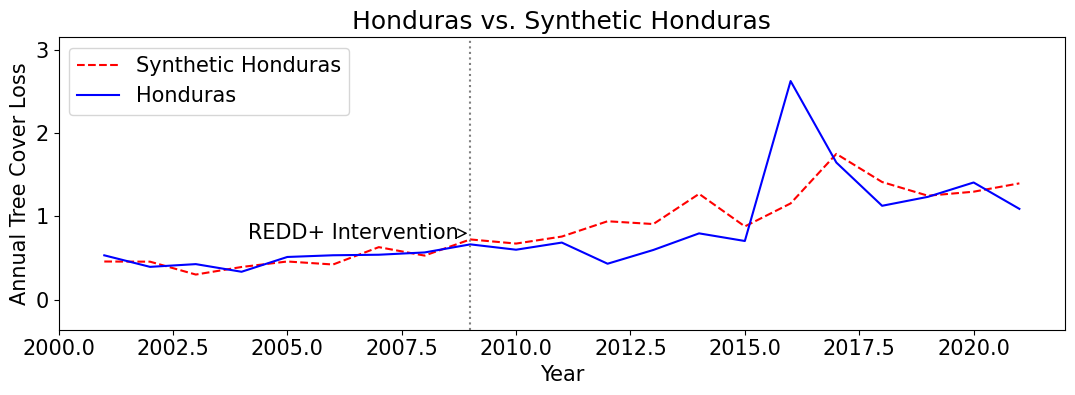

In [503]:
sc.plot(["original"], treated_label="Honduras", 
            synth_label="Synthetic Honduras", treatment_label="REDD+ Intervention", figsize=(12, 5))

In [ ]:
sc = Synth(main, 'Annual Tree Cover Loss', 'Country', 'Year', 2016, 'Gabon', n_optim=50)

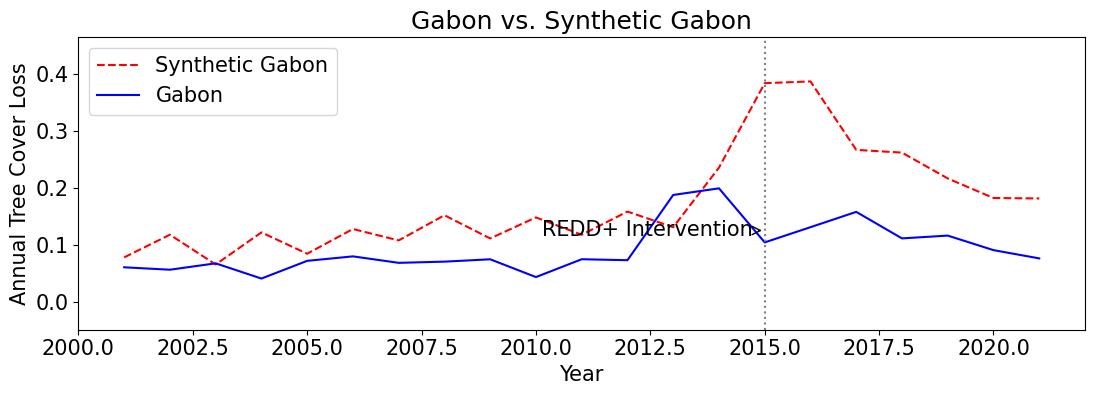

In [507]:
sc.plot(["original"], treated_label="Gabon", 
            synth_label="Synthetic Gabon", treatment_label="REDD+ Intervention", figsize=(12, 5))

In [ ]:
sc.in_space_placebo()

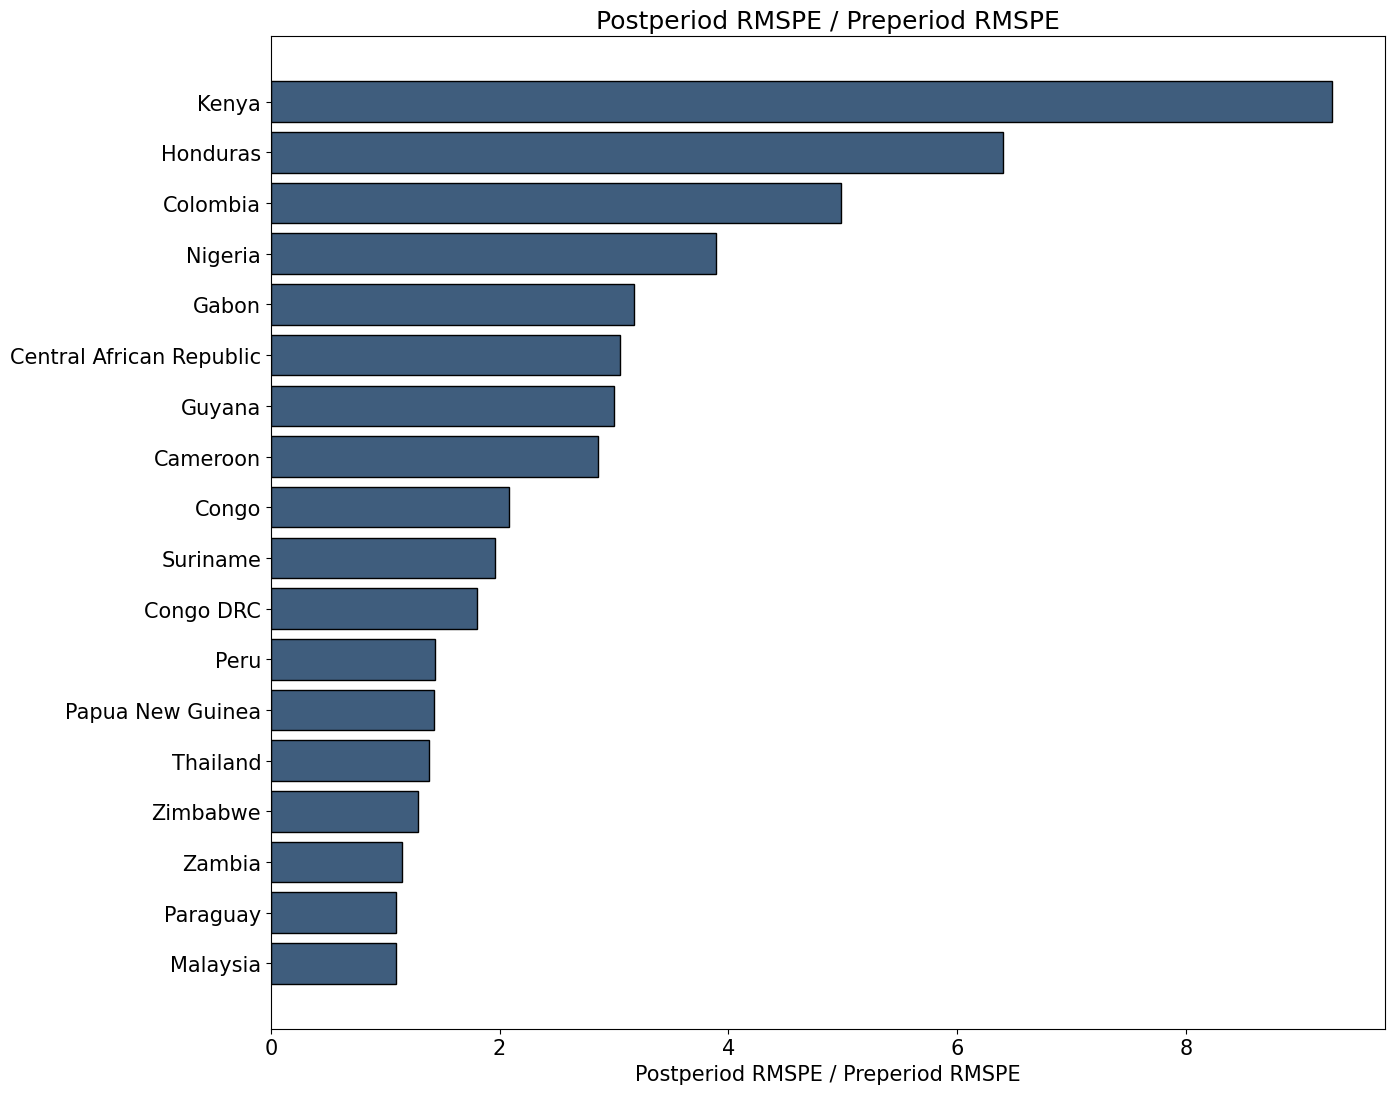

In [520]:
sc.plot(['rmspe ratio'])

In [ ]:
sc = Synth(main, 'Annual Tree Cover Loss', 'Country', 'Year', 2010, 'Guyana')

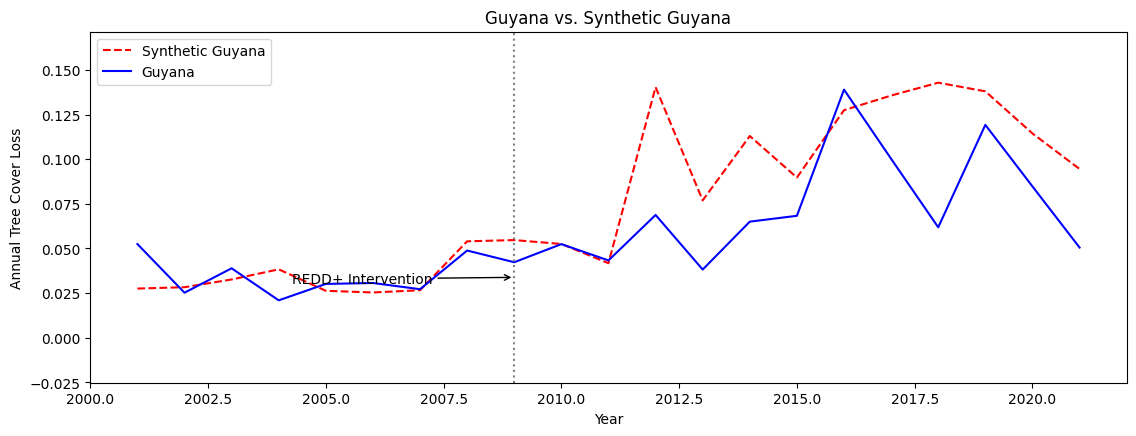

In [525]:
plt.rcParams.update({'font.size': 10})

sc.plot(["original"], treated_label="Guyana", 
            synth_label="Synthetic Guyana", treatment_label="REDD+ Intervention", figsize=(12, 5))

In [524]:
sc.original_data.weight_df

,Weight
Suriname,0.992778
